# Лабораторная работа №1
## Выполнил студент группы БВТ2103 Полуян Юлия Алксандровна

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [ ]:
print("Hello, World!")

Hello, World!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [ ]:
from random import randint
from pprint import pprint
import time

In [ ]:
m = int(input("m = "))
n = int(input("n = "))

min_lim = int(input("min_limit = "))
max_lim = int(input("max_limit = "))

Matrix = [[randint(min_lim, max_lim) for i in range(m)] for j in range(n)]

pprint(Matrix)

m = 4
n = 5
min_limit = 12
max_limit = 123
[[98, 53, 43, 60],
 [39, 14, 100, 68],
 [115, 12, 80, 18],
 [94, 103, 91, 46],
 [38, 48, 54, 119]]


### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [ ]:
import copy
import random
import timeit
import matplotlib.pyplot as plt

def generateMatrix(m=int, n=int, min_lim=int, max_lim=int):
    matrix = [[random.randint(min_lim, max_lim) for i in range(m)] for i in range(n)]
    for i in range(m):
        for j in range(n):
            print(matrix[j][i], end=' ')
        print()
    return matrix

s = input()
s_list = s.split()
print("Матрица")
if len(s_list) == 1:
    arrayExample = generateMatrix(int(s_list[0]))
if len(s_list) == 2:
    arrayExample = generateMatrix(int(s_list[0]), int(s_list[1]))
if len(s_list) == 3:
    arrayExample = generateMatrix(int(s_list[0]), int(s_list[1]), int(s_list[2]))
if len(s_list) == 4:
    arrayExample = generateMatrix(int(s_list[0]), int(s_list[1]), int(s_list[2]), int(s_list[3]))
if len(s_list) == 0:
    arrayExample = generateMatrix()

4 5 12 123
Матрица
61 66 50 93 104 
119 93 54 87 38 
12 105 32 60 118 
47 61 46 37 67 


In [ ]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.

def selectionSort(q):
    w = q.copy()
    for e in range(len(w)):
        for i in range(len(w[e]) - 1):
            m = i
            j = i + 1
            while j < len(w[e]):
                if w[e][j] < w[e][m]:
                    m = j
                j = j + 1
            w[e][i], w[e][m] = w[e][m], w[e][i]
    return w

start_time = timeit.default_timer()
selectionSort(arrayExample)
print("Время работы сортировки выбором: " +  "--- {0} ms ---".format((timeit.default_timer() - start_time)*1000))



Время работы сортировки выбором: --- 0.09718000001157634 ms ---


In [ ]:
# Сортировка вставкой.
def insertionSort(q):
    w = q.copy()
    for r in range(len(w)):
        for i in range(1, len(w[r])):
            k = w[r][i]
            j = i - 1
            while j >= 0 and k < w[r][j]:
                w[r][j + 1] = w[r][j]
                j -= 1
            w[r][j + 1] = k
    return w

start_time = timeit.default_timer()
insertionSort(arrayExample)
print("Время работы сортировки вставкой: " +  "--- {0} ms ---".format((timeit.default_timer() - start_time)*1000))

Время работы сортировки вставкой: --- 0.09080999984689697 ms ---


In [ ]:
# Сортировка обменом. || Сортировка пузырьком.
def bubbleSort(q):
    w = q.copy()
    for r in range(len(w)):
        for i in range(len(w[r])):
            for j in range(len(w[r]) - i - 1):
                if w[r][j] > w[r][j + 1]:
                    w[r][j], w[r][j + 1] = w[r][j + 1], w[r][j]
    return w

start_time = timeit.default_timer()
bubbleSort(arrayExample)
print("Время работы сортировки обменом: " +  "--- {0} ms ---".format((timeit.default_timer() - start_time)*1000))


Время работы сортировки обменом: --- 0.09375000013278623 ms ---


In [ ]:
# Сортировка Шелла.
def shellsSort(q):
    w = q.copy()
    for r in range(len(w)):
        d = len(w) // 2
        while d:
            for i, el in enumerate(w[r]):
                while i >= d and w[r][i - d] > el:
                    w[r][i] = w[r][i - d]
                    i -= d
                w[r][i] = el
            d = 1 if d == 2 else int(d * 5.0 / 11)
    return w

start_time = timeit.default_timer()
shellsSort(arrayExample)
print("Время работы сортировки Шелла: " + "--- {0} ms ---".format((timeit.default_timer() - start_time)*1000)

Время работы сортировки Шелла: --- 0.09417000001121778 ms ---


In [ ]:
# Быстрая сортировка.
def quickSort(w):
    q = w.copy()
    for i in range(len(q)):
        supportQuickSortMethod(0, len(q[i]) - 1, q, i)
    return q


def supportQuickSortMethod(a_first, a_last, array, row):
    first = int(a_first)
    last = int(a_last)
    middle = int((first + last) / 2)

    while (first < last):

        while (array[row][first] < array[row][middle]):
            first += 1
        while (array[row][last] > array[row][middle]):
            last -= 1
        if (first <= last):
            array[row][first], array[row][last] = array[row][last], array[row][first]
            first += 1
            last -= 1

    if (a_first < last):
        supportQuickSortMethod(a_first, last, array, row)
    if (first < a_last):
        supportQuickSortMethod(first, a_last, array, row)

start_time = timeit.default_timer()
quickSort(arrayExample)
print("Время работы быстрой сортировки: " + "--- {0} ms ---".format((timeit.default_timer() - start_time)*1000))

    

Время работы быстрой сортировки: --- 0.13007999996261788 ms ---


Время работы турнирной сортировки: --- 0.22083999965616385 ms ---


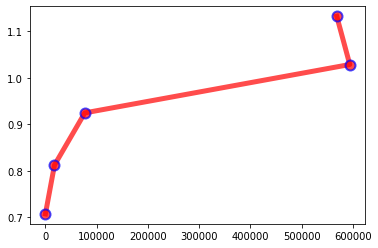

In [ ]:
# Турнирная сортировка.
def tournamentSort(array, m, n):
    arr1 = array.copy()
    for i in range(len(arr1)):
        supportTournamentSortMethod(arr1[i])
    return arr1


def supportTournamentSortMethod(arr1):
    y = [None] * 2 * (len(arr1) + len(arr1) % 2)
    index = len(y) - len(arr1) - len(arr1) % 2

    for i, v in enumerate(arr1):
        y[index + i] = (i, v)

    for j in range(len(arr1)):
        n = len(arr1)
        index = len(y) - len(arr1) - len(arr1) % 2
        while index > -1:
            n = (n + 1) // 2
            for i in range(n):
                i = max(index + i * 2, 1)
                if y[i] != None and y[i + 1] != None:
                    if y[i][1] < y[i + 1][1]:
                        y[i // 2] = y[i]
                    else:
                        y[i // 2] = y[i + 1]
                else:
                    y[i // 2] = y[i] if y[i] != None else y[i + 1]
            index -= n

        index, x = y[0]
        arr1[j] = x
        y[len(y) - len(arr1) - len(arr1) % 2 + index] = None

start_time = timeit.default_timer()
tournamentSort(arrayExample,m[i],n[i])
print("Время работы турнирной сортировки: " + "--- {0} ms ---".format((timeit.default_timer() - start_time)*1000))


m = [15,89,627,876,987]
n = [20,202,123,678,576]
s = [m[0]*n[0],m[1]*n[1],m[2]*n[2],m[3]*n[3],m[4]*n[4]]
t = [0,0,0,0,0]
for i in range(5):
    timeit.default_timer()
    tournamentSort(arrayExample,m[i],n[i])
    t[i] = (timeit.default_timer() - start_time)*1000
plt.plot(s, t, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.show()

### Вывод


В ходе выполнения лабораторной работы мы написали генератор случайных матриц, а также реализовали методы сортировки строк матрицы.